# EXTRAÇAÕ DE DADOS DA API

In [1]:
import requests
import pandas as pd

url = "https://brasilapi.com.br/api/banks/v1"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    print("Error:", response.status_code)

# CRIAÇÃO DE DATA FRAME

In [2]:
df = pd.DataFrame(data)

df = df.rename(columns={
    "name": "nome",
    "code": "codigo",
    "fullName": "nome_completo",
})

display(df.head())

,ispb,nome,codigo,nome_completo
0,00000000,BCO DO BRASIL S.A.,1.0,Banco do Brasil S.A.
1,00000208,BRB - BCO DE BRASILIA S.A.,70.0,BRB - BANCO DE BRASILIA S.A.
2,00038121,Selic,NaN,Banco Central do Brasil - Selic
3,00038166,Bacen,NaN,Banco Central do Brasil
4,00122327,SANTINVEST S.A. - CFI,539.0,"SANTINVEST S.A. - CREDITO, FINANCIAMENTO E INV..."


# FILTROS

In [4]:
filtro1 = df[df["codigo"].notnull()]
display(filtro1.head())

,ispb,nome,codigo,nome_completo
0,00000000,BCO DO BRASIL S.A.,1.0,Banco do Brasil S.A.
1,00000208,BRB - BCO DE BRASILIA S.A.,70.0,BRB - BANCO DE BRASILIA S.A.
4,00122327,SANTINVEST S.A. - CFI,539.0,"SANTINVEST S.A. - CREDITO, FINANCIAMENTO E INV..."
5,00204963,CCR SEARA,430.0,COOPERATIVA DE CREDITO RURAL SEARA - CREDISEARA
6,00250699,AGK CC S.A.,272.0,AGK CORRETORA DE CAMBIO S.A.


In [5]:
filtro2 = df[df["nome"].str.contains("Banco", case=False, na=False)]
display(filtro2.head())

,ispb,nome,codigo,nome_completo
11,00416968,BANCO INTER,77.0,Banco Inter S.A.
14,00556603,BANCO BARI S.A.,330.0,BANCO BARI DE INVESTIMENTOS E FINANCIAMENTOS S.A.
17,00795423,BANCO SEMEAR,743.0,Banco Semear S.A.
31,02038232,BANCO SICOOB S.A.,756.0,BANCO COOPERATIVO SICOOB S.A. - BANCO SICOOB
54,04184779,BANCO BRADESCARD,63.0,Banco Bradescard S.A.


In [6]:
filtro3 = df[df["codigo"] < 100]
display(filtro3.head())

,ispb,nome,codigo,nome_completo
0,00000000,BCO DO BRASIL S.A.,1.0,Banco do Brasil S.A.
1,00000208,BRB - BCO DE BRASILIA S.A.,70.0,BRB - BANCO DE BRASILIA S.A.
11,00416968,BANCO INTER,77.0,Banco Inter S.A.
20,00997185,BCO B3 S.A.,96.0,Banco B3 S.A.
35,02398976,SISPRIME DO BRASIL - COOP,84.0,SISPRIME DO BRASIL - COOPERATIVA DE CRÉDITO


# DOWNLOAD

In [13]:
df.to_csv("bancos.csv", index=False, encoding="utf-8")
filtro1.to_csv("bancos_com_codigo.csv", index=False, encoding="utf-8")
filtro2.to_csv("bancos_com_nome_'bancos'.csv", index=False, encoding="utf-8")
filtro3.to_csv("bancos_com_codigo_menor_100.csv", index=False, encoding="utf-8")

# ANÁLISES

In [ ]:
import matplotlib.pyplot as plt

In [49]:
total = df.shape[0]
com_codigo = filtro1.shape[0]
com_banco_no_nome = filtro2.shape[0]
codigo_menor_100 = filtro3.shape[0]

total, com_codigo, com_banco_no_nome, codigo_menor_100

(357, 348, 27, 51)

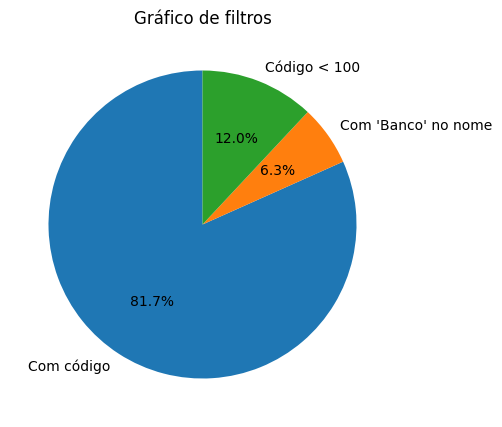

In [50]:
plt.figure(figsize=(5,5))
plt.pie(
    [com_codigo, com_banco_no_nome, codigo_menor_100],
    labels=["Com código", "Com 'Banco' no nome", "Código < 100"],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Gráfico de filtros")
plt.show()


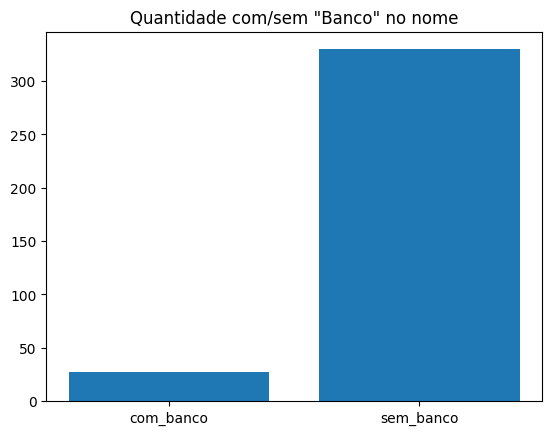

In [47]:
plt.bar(['com_banco', "sem_banco"], [com_banco_no_nome, total - com_banco_no_nome])
plt.title('Quantidade com/sem "Banco" no nome')
plt.show()

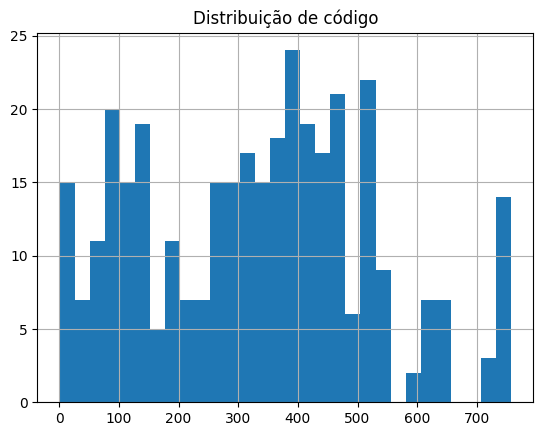

In [48]:
df['codigo'].dropna().astype(int).hist(bins=30)
plt.title('Distribuição de código')
plt.show()

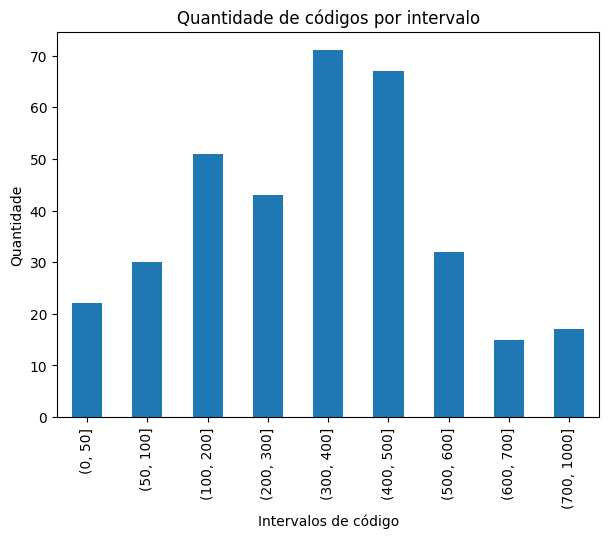

In [65]:
df['codigo']
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 1000]
df['faixa_codigo'] = pd.cut(df['codigo'], bins=bins)
contagem_faixas = df['faixa_codigo'].value_counts().sort_index()
contagem_faixas.plot(kind='bar', figsize=(7,5))

plt.title("Quantidade de códigos por intervalo")
plt.xlabel("Intervalos de código")
plt.ylabel("Quantidade")
plt.show()